# **Week 2: Keplerian dynamics using Analytic, Euler and Verlet methods**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Kepler Model: Analitc Solution Key Equations and Concepts**

1. **Eccentricity ($e$)**: Determines the shape of the orbit.
   - $e = |\mathbf{v}|^2 - 1$
   - For $e < 1$: The trajectory is an ellipse (bound orbit).
   - For $e = 1$: The trajectory is a parabola (critical orbit).
   - For $e > 1$: The trajectory is a hyperbola (unbound orbit).

2. **Semi-major Axis ($a$)**: For elliptical orbits, it represents half the longest diameter.
   - $a = \frac{1}{1 - e}$

3. **Semi-minor Axis ($b$)**:
   - For $e < 1$: $b = a \sqrt{1 - e^2}$
   - For $e > 1$: $b = a \sqrt{e^2 - 1}$

4. **Parametric Equations**:
   - For elliptical orbits ($e < 1$):
     - $x(\theta) = -a e + a \cos(\theta)$
     - $y(\theta) = b \sin(\theta)$
   - For hyperbolic orbits ($e > 1$):
     - $x(\theta) = -a e + a \cosh(\theta)$
     - $y(\theta) = b \sinh(\theta)$

## Implementation Details

- **Eccentricity Calculation**: The function computes the eccentricity using the norm of the initial velocity vector: $e = |\mathbf{v}|^2 - 1$.

- **Semi-major Axis**: Calculated as $a = \frac{1}{1 - e}$.

- **Trajectory Calculation**:
  - For $e < 1$ (elliptical orbits):
    - The function generates 50 equally spaced values of $\theta$ from 0 to $2\pi$.
    - Computes the corresponding $x$ and $y$ coordinates using the parametric equations for an ellipse.
  - For $e > 1$ (hyperbolic orbits):
    - Calculates the maximum value of the hyperbolic angle $\theta$ based on the initial velocity and the parameter $T$.
    - Generates 50 equally spaced values of the hyperbolic angle $\theta$ from $-\theta_{\text{max}}$ to $\theta_{\text{max}}$.
    - Computes the corresponding $x$ and $y$ coordinates using the parametric equations for a hyperbola.

- **Return Values**: The function returns the $x$ and $y$ coordinates of the trajectory as numpy arrays.

In [3]:
def kepler_analytic(vel,T):

    #-------------------------------------------------------------------------------
    # Calculate the analytic trajectory for the Kepler central force problem.
    # Assumes an initial position r = (1,0), v = (0,vel).
    #-------------------------------------------------------------------------------
    # INPUTS:
    # - vel: the initial speed.
    # - T: sets an upper limit for |theta| for the e > 1 case (plot up to the
    #        integration time).
    #-------------------------------------------------------------------------------

    # Calculate trajectory from analytic solution

    ecc = np.linalg.norm(vel)**2 - 1        # Eccentricity
    a = 1/(1 - ecc)                         # Semi-major axis

    if ecc < 1:

        theta = np.linspace(0, 2*np.pi, 50) # Equally spaced values from 0 to 2*pi
        b = a * np.sqrt(1 - ecc**2)
        xan = -a * ecc + a * np.cos(theta)
        yan =  b * np.sin(theta)

    else:

        b = a * np.sqrt(ecc**2 - 1)
        theta_max = np.asinh(np.linsalg.norm(vel) * T/b) # Limit for range of theta
        that = np.linspace( -theta_max, theta_max, 50)
        xan = - a * ecc + a * np.cosh(theta)
        yan =   b * np.sinh(theta)

    return xan, yan
    

=========================================================================================================
=========================================================================================================


# **Numerical Integration of the Kepler Problem Using Euler's Method**

## **Key Components of the Code**

## Non-Dimensional Variables

To non-dimensionalize the equations governing the Kepler problem, we introduce characteristic units for length, time, and mass:

- **Characteristic Length ($L_0$)**: Typically chosen as the semi-major axis of the orbit or another relevant length scale.
- **Characteristic Time ($T_0$)**: Defined based on the orbital period or a combination of $L_0$ and the gravitational constant.
- **Characteristic Mass ($M_0$)**: Often taken as the mass of the central body.

Using these characteristic units, we define non-dimensional variables:

- **Non-Dimensional Position ($\mathbf{r}'$)**: $\mathbf{r}' = \frac{\mathbf{r}}{L_0}$
- **Non-Dimensional Time ($t'$)**: $t' = \frac{t}{T_0}$
- **Non-Dimensional Velocity ($\mathbf{v}'$)**: $\mathbf{v}' = \frac{\mathbf{v} \cdot T_0}{L_0}$

## Non-Dimensional Equations of Motion

Starting from Newton's second law for gravitational attraction:

$$
\mathbf{a} = -\frac{G M}{r^3} \mathbf{r}
$$

where $\mathbf{a}$ is the acceleration, $G$ is the gravitational constant, $M$ is the mass of the central body, and $r = |\mathbf{r}|$ is the distance between the two bodies.

By substituting the non-dimensional variables, the equation transforms to:

$$
\mathbf{a}' = -\frac{1}{r'^3} \mathbf{r}'
$$

where $\mathbf{a}'$ and $r'$ are the non-dimensional acceleration and distance, respectively. This form eliminates explicit dependence on $G$ and $M$, simplifying the analysis.


## Application in Numerical Integration

In the provided code, non-dimensionalization is applied as follows:

- **Time Step ($\tau$)**: The non-dimensional time increment for each iteration.
- **Initial Position and Velocity**: Set as $\mathbf{r} = [1, 0]$ and $\mathbf{v} = [0, 1]$, corresponding to specific initial conditions in non-dimensional units.
- **Total Integration Time ($T$)**: Chosen as $4\pi$, covering two orbital periods for a circular orbit.



1. **Initial Conditions**:
   - **Time Step ($\tau$)**: The non-dimensional time increment for each iteration.
   - **Position and Velocity**: Initialized as $\mathbf{r} = [1, 0]$ and $\mathbf{v} = [0, 1]$, respectively.
   - **Total Integration Time ($T$)**: Set to $4\pi$, covering two orbital periods for a circular orbit.
   - **Number of Steps**: Calculated as $\text{numSteps} = \lceil T / \tau \rceil$.

2. **Analytic Solution**:
   - The function `kepler_analytic` computes the exact trajectory based on initial conditions for comparison.

3. **Preallocation of Arrays**:
   - Arrays for time (`time`), positions (`x`, `y`), and energy (`energy`) are preallocated for efficiency.

4. **Initial Calculations**:
   - **Radial Distance ($r$)**: Computed as the Euclidean norm of the position vector.
   - **Speed**: Magnitude of the velocity vector.
   - **Acceleration**: Given by $\mathbf{a} = -\mathbf{r} / r^3$, representing the gravitational force per unit mass.
   - **Total Energy**: $E = \frac{1}{2} |\mathbf{v}|^2 - \frac{1}{r}$, combining kinetic and potential energy.

5. **Euler’s Method Integration**:
   - **Position Update**: $\mathbf{r}_{n+1} = \mathbf{r}_n + \tau \mathbf{v}_n$
   - **Velocity Update**: $\mathbf{v}_{n+1} = \mathbf{v}_n + \tau \mathbf{a}_n$
   - **Recalculation**: After each update, $r$, speed, and acceleration are recalculated for the new position.
   - **Storage**: Updated positions and energy are stored in their respective arrays.


	•	Local Error: On the order of $\mathcal{O}(\Delta t^2)$. ￼
	•	Global Error: Accumulates to the order of $\mathcal{O}(\Delta t)$ over time

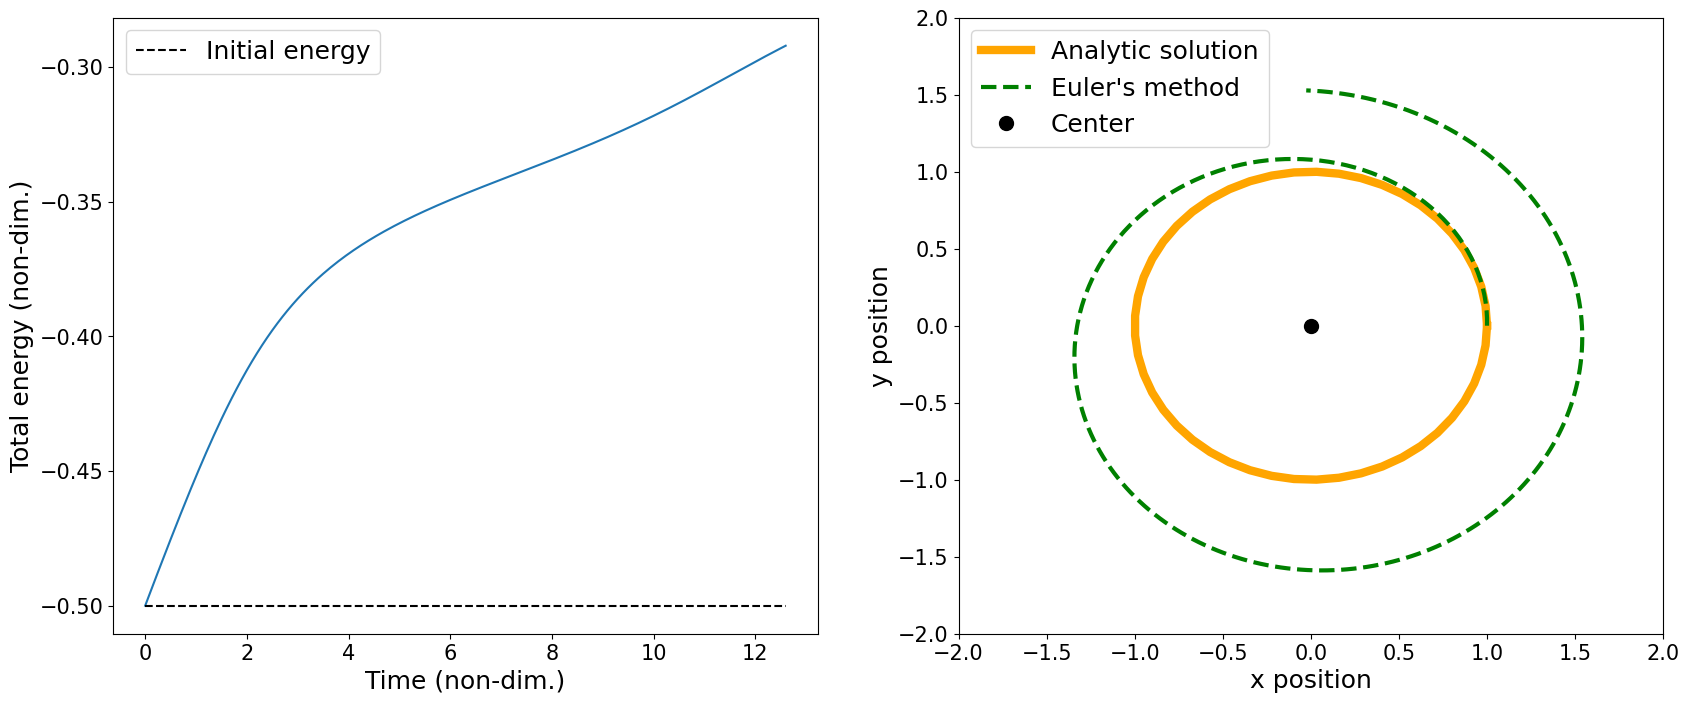

In [6]:
# Set up all initial conditions:

# Time step (non-dim.)
tau = 0.05

# Initial position (non-dim.) 
pos = np.array([1, 0])

# Initial velocity (non-dim.) 
vel = np.array([0, 1])

# Total integration time
T = 4*np.pi

# Number of integration steps
numSteps = int(np.ceil(T/tau))

# Calculate trajectory from analytic solution.
xan, yan = kepler_analytic(vel, T)

# Preallocate vectors for speed:
time = tau*np.arange(numSteps+1)
x = np.zeros(numSteps+1)
y = np.zeros(numSteps+1)
energy = np.zeros(numSteps+1)

# Initial values:
x[0] = pos[0]
y[0] = pos[1]
r = np.linalg.norm(pos)
speed = np.linalg.norm(vel)
accel = -pos/r**3
energy[0] = 0.5*speed**2 - 1/r

#-------------------------------------------------------------------------------
# Euler's method integration
#-------------------------------------------------------------------------------

for n in range(0, numSteps):
            
    # Take one step of Euler's method:
    pos = pos + tau * vel
    vel = vel + tau * accel

    # Calculate radial position, speed and acceleration at step n:
    r = np.linalg.norm(pos)
    speed = np.linalg.norm(vel)
    accel = - pos/r ** 3

    # Store position, time, energy after taking the step:
    x[n+1] = pos[0]
    y[n+1] = pos[1]
    energy[n+1] = 0.5 * speed ** 2 - 1/r
    

# Set up figure 
fig, ax = plt.subplots(1,2, figsize=(20,8))
    
# Left plot:

ax[0].plot(time,energy)
ax[0].plot([min(time),max(time)],np.ones(2)*energy[0], '--k', label='Initial energy') # Initial energy line

ax[0].tick_params(labelsize=15)
ax[0].set_xlabel("Time (non-dim.)", fontsize=18);
ax[0].set_ylabel("Total energy (non-dim.)", fontsize=18)
ax[0].legend(fontsize=18);

# Right plot 

ax[1].plot(xan,yan, color='orange', lw=6, label="Analytic solution")
ax[1].plot(x,y, '--g', lw=3, label="Euler's method")
ax[1].plot(0,0, 'ko', markersize = 10, label="Center")

ax[1].tick_params(labelsize=15)
ax[1].set(xlim=[-2,2], ylim=[-2,2])
ax[1].set_xlabel("x position", fontsize=18)
ax[1].set_ylabel("y position", fontsize=18)
ax[1].legend(fontsize=18);

## **Euler Solution: Discussion**

Euler’s method is a straightforward numerical technique for solving ordinary differential equations. However, when applied to the Kepler problem, it exhibits limitations:

- **Energy Conservation**: The left plot shows that total energy is not conserved over time, indicating that Euler’s method introduces numerical errors that accumulate, leading to unphysical results.
  
- **Trajectory Accuracy**: The right plot reveals that the numerical trajectory deviates from the analytic solution, with the orbit either spiraling outward or inward, depending on the time step size.

These issues arise because Euler’s method is not symplectic; it does not preserve the geometric properties of Hamiltonian systems like the Kepler problem. Consequently, more advanced integrators, are preferred for long-term simulations of orbital dynamics.


=====================================================================================
=====================================================================================


# Numerical Integration of the Kepler Problem Using the Verlet Method

## Overview

This code numerically integrates the equations of motion for a two-body system under gravitational interaction, using the Verlet integration method. The Verlet method is time-reversibility and symplectic, which help in conserving energy over long simulations.

## Key Components of the Code

1. **Initial Conditions**:
   - **Time Step ($\tau$)**: The non-dimensional time increment for each iteration, set to $\tau = 0.0005$.
   - **Initial Position**: $\mathbf{r}_0 = [1, 0]$, representing the starting position in non-dimensional units.
   - **Initial Velocity**: $\mathbf{v}_0 = [0, 1]$, representing the initial velocity in non-dimensional units.
   - **Total Integration Time ($T$)**: Set to $4\pi$, covering two complete orbital periods for a circular orbit.
   - **Number of Integration Steps**: Calculated as $\text{numSteps} = \lceil T / \tau \rceil$, determining the total number of iterations.


2. **Initial Calculations**:
   - **Radial Distance ($r$)**: Computed as the Euclidean norm of the position vector.
   - **Speed**: Magnitude of the velocity vector.
   - **Acceleration**: Given by $\mathbf{a} = -\mathbf{r} / r^3$, representing the gravitational force per unit mass.
   - **Total Energy**: $E = \frac{1}{2} |\mathbf{v}|^2 - \frac{1}{r}$, combining kinetic and potential energy.

3. **Verlet Integration Method**:
   - **First Step**: Initializes the position using a midpoint method:
     $$
     \mathbf{r}_{1} = \mathbf{r}_0 + \tau \mathbf{v}_0 + \frac{1}{2} \tau^2 \mathbf{a}_0
     $$
   - **Subsequent Steps**: Updates positions using the standard Verlet formula:
     $$
     \mathbf{r}_{n+1} = 2\mathbf{r}_n - \mathbf{r}_{n-1} + \tau^2 \mathbf{a}_n
     $$
   - **Velocity Calculation**: For energy computation, velocities are approximated as:
     $$
     \mathbf{v}_n = \frac{\mathbf{r}_{n+1} - \mathbf{r}_{n-1}}{2\tau}
     $$
   - **Acceleration Update**: After each position update, acceleration is recalculated based on the new position:
     $$
     \mathbf{a}_{n+1} = -\frac{\mathbf{r}_{n+1}}{|\mathbf{r}_{n+1}|^3}
     $$
   - **Energy Update**: Total energy is computed at each step to monitor conservation:
     $$
     E_{n+1} = \frac{1}{2} |\mathbf{v}_{n+1}|^2 - \frac{1}{|\mathbf{r}_{n+1}|}
     $$
	•	Local Error: On the order of $\mathcal{O}(\Delta t^3)$.
	•	Global Error: Accumulates to the order of $\mathcal{O}(\Delta t^2)$ over time. ￼





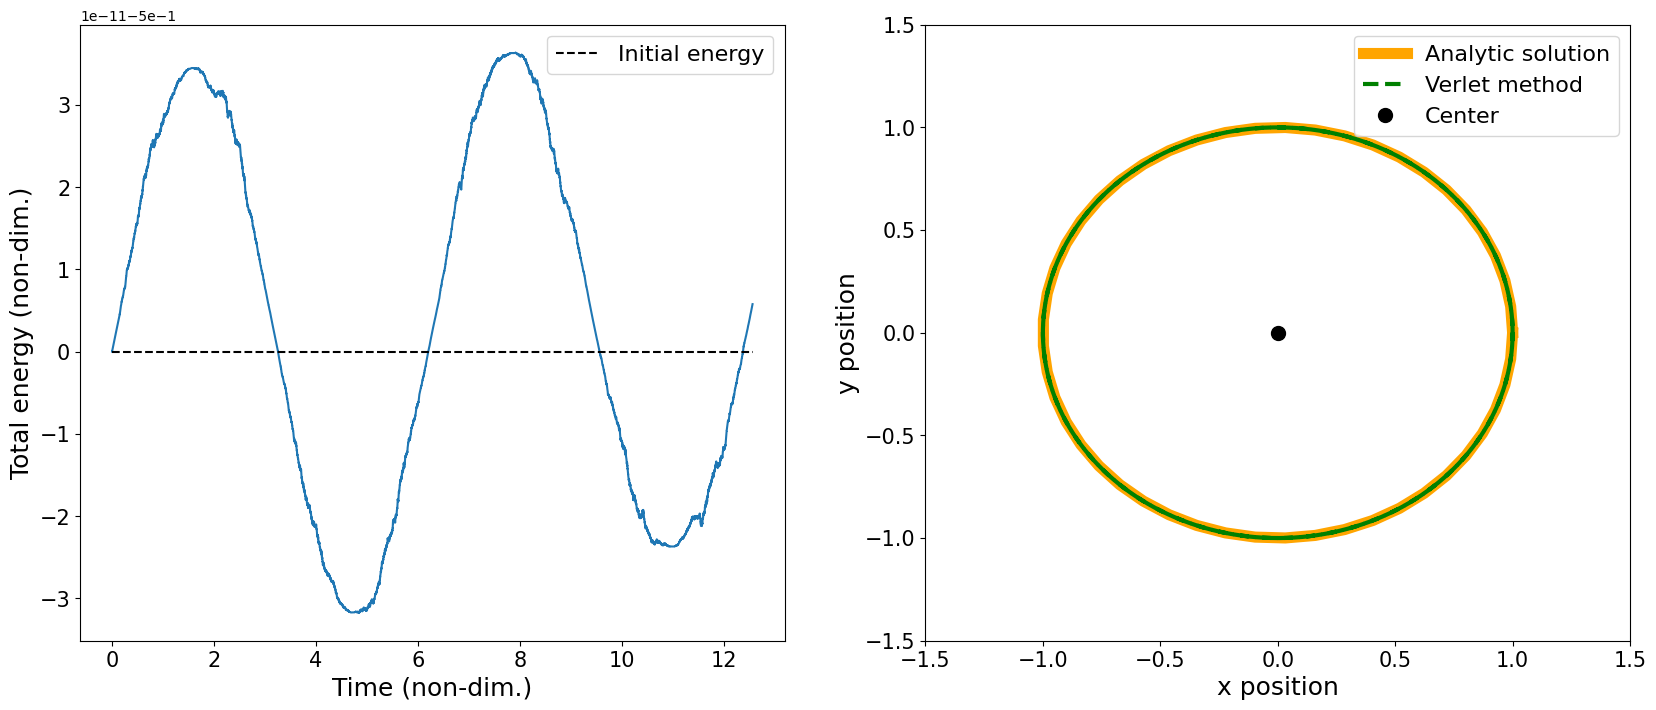

In [7]:
# Set up all initial conditions:

# Time step (non-dim.)
tau = 0.0005

# Initial position (non-dim.) 
pos = np.array([1, 0])

# Initial velocity (non-dim.) 
vel = np.array([0, 1])

# Total integration time
T = 4*np.pi

# Number of integration steps
numSteps = int(np.ceil(T/tau))

# Calculate trajectory from analytic solution.
xan, yan = kepler_analytic(vel, T)

# Preallocate vectors for speed:
time = tau*np.arange(numSteps+1)
x = np.zeros(numSteps+1)
y = np.zeros(numSteps+1)
energy = np.zeros(numSteps+1)

# Initial values:
x[0] = pos[0]
y[0] = pos[1]
r = np.linalg.norm(pos)
speed = np.linalg.norm(vel)
accel = -pos/r**3
energy[0] = 0.5*speed**2 - 1/r

#-------------------------------------------------------------------------------
# Verlet method integration
#-------------------------------------------------------------------------------

prev = np.zeros_like(pos)
next_pos = np.zeros_like(pos)

for n in range(0, numSteps):

    # Take one step of the Verlet Method to update position:
    if n==0:
        # Get started with a midpoint method step
        next_pos = pos + tau*vel + 0.5*tau**2*accel
    else:
        # Normal Verlet update:
        next_pos = 2*pos - prev + tau**2*accel

    # Take one step of the Verlet Method to update velocity
    # (only required to compute energy, not the trajectory)
    if n==0:
        # Do a special (Velocity-Verlet) update for the very first step:
        r = np.linalg.norm(next_pos)
        accel_n2 = -next_pos/r**3
        vel = vel + tau/2*(accel + accel_n2)
    else: # n > 1
        # Do a Verlet update:
        vel = (next_pos - prev)/(2*tau)

    # Calculate speed, radial position, and acceleration after taking the step:
    speed = np.linalg.norm(vel)
    r = np.linalg.norm(next_pos)
    accel = -next_pos/r**3

    # Update energy after taking the step:
    energy[n+1] = 0.5*speed**2 - 1/r

    # Store position update:
    x[n+1] = next_pos[0]
    y[n+1] = next_pos[1]

    # Update 'prev' and 'pos' to calculate 'next_pos' in the following step:
    prev = pos
    pos = next_pos
    

# Set up figure
    
fig, ax = plt.subplots(1,2, figsize=(20,8))

# Left plot:

ax[0].plot(time,energy)
ax[0].plot([min(time),max(time)],np.ones(2)*energy[0], '--k', label='Initial energy') # Initial energy line

ax[0].tick_params(labelsize=15)
ax[0].set_xlabel("Time (non-dim.)", fontsize=18);
ax[0].set_ylabel("Total energy (non-dim.)", fontsize=18)
ax[0].legend(fontsize=16);

# Right plot 

ax[1].plot(xan, yan, color='orange', lw=8, label="Analytic solution")
ax[1].plot(x,y, '--g', lw=3, label="Verlet method")
ax[1].plot(0,0, 'ko', markersize = 10, label="Center")

ax[1].tick_params(labelsize=15)
ax[1].set(xlim=[-1.5,1.5], ylim=[-1.5,1.5])
ax[1].set_xlabel("x position", fontsize=18)
ax[1].set_ylabel("y position", fontsize=18)
ax[1].legend(fontsize=16);

## **Verlet Solution: Discussion**

The Verlet integration method offers several advantages for simulating orbital dynamics:

- **Energy Conservation**: The left plot demonstrates that total energy remains nearly constant over time, indicating that the Verlet method introduces minimal numerical errors, thereby preserving the physical properties of the system.

- **Trajectory Accuracy**: The right plot shows that the numerical trajectory closely matches the analytic solution, validating the effectiveness of the Verlet method in accurately simulating the orbit.

These benefits arise because the Verlet method is a symplectic integrator, meaning it preserves the geometric properties of Hamiltonian systems like the Kepler problem. This preservation leads to improved stability and accuracy in long-term simulations compared to non-symplectic methods such as the standard Euler method.

==================================================================================================================
=============================================================================================================




# **Key concepts**

 The standard Euler method updates the position by considering only the linear dependence on time, effectively assuming constant velocity during each time step. However, in systems experiencing acceleration, the position update should account for the quadratic dependence on time due to the acceleration term.

**Euler Method Position Update:**

In the explicit Euler method, the position is updated as:

$ \mathbf{r}_{n+1} = \mathbf{r}_n + \mathbf{v}_n \Delta t $

This formula assumes that the velocity \( \mathbf{v}_n \) remains constant over the time step \( \Delta t \), neglecting any changes due to acceleration.

**Accurate Position Update with Acceleration:**

For a more accurate update, especially in the presence of acceleration, the position should be updated using the kinematic equation that includes the acceleration term:

$ \mathbf{r}_{n+1} = \mathbf{r}_n + \mathbf{v}_n \Delta t + \frac{1}{2} \mathbf{a}_n \Delta t^2 $

Here, $ \mathbf{a}_n $ is the acceleration at time step $ n $. This equation accounts for the fact that the velocity is changing due to acceleration, leading to a more accurate position update.

**Alternative Methods:**

Numerical integration methods like the Verlet integrator incorporate this quadratic term, providing more accurate results for systems with acceleration. The Verlet method updates the position as:

$ \mathbf{r}_{n+1} = 2\mathbf{r}_n - \mathbf{r}_{n-1} + \mathbf{a}_n \Delta t^2 $

This approach inherently considers the effects of acceleration, leading to better energy conservation and trajectory accuracy over time.

In summary, while the Euler method offers simplicity, it lacks the precision required for systems where acceleration plays a significant role. Incorporating the acceleration term in the position update, as done in methods like the Verlet integrator, yields more accurate and reliable results.